In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [6]:
ds = pd.read_csv('dataset_website.csv')

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [8]:
ds.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [9]:
x = ds.iloc[:,1:31].values
y = ds.iloc[:,-1].values

In [10]:
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

In [13]:
log_reg = accuracy_score(y_test,y_pred1)

In [21]:
log_reg

0.9167797376752601

In [15]:
pickle.dump(lr,open('Phishing_website.pkl','wb'))

### Visualising using Confusion Matrix

In [16]:
import matplotlib.pyplot as plt

In [22]:
confusion_matrix = metrics.confusion_matrix(y_pred1, y_test)

In [23]:
print(confusion_matrix)

[[ 905   75]
 [ 109 1122]]


In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

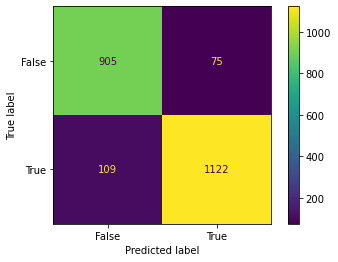

In [28]:
cm_display.plot()

### Visualising using Classification Report

In [30]:
from sklearn.metrics import classification_report

In [31]:
classification_report = metrics.classification_report(y_pred1, y_test)

In [32]:
print(classification_report)

              precision    recall  f1-score   support

          -1       0.89      0.92      0.91       980
           1       0.94      0.91      0.92      1231

    accuracy                           0.92      2211
   macro avg       0.91      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211

